<a href="https://colab.research.google.com/github/kshitijv256/DSA-python/blob/main/equation_solve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/drive/MyDrive/eq_solver/data.zip -d /content/data/

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/9/9_68284.jpg  
  inflating: /content/data/9/9_68432.jpg  
  inflating: /content/data/9/9_68710.jpg  
  inflating: /content/data/9/9_68858.jpg  
  inflating: /content/data/9/9_6892.jpg  
  inflating: /content/data/9/9_70042.jpg  
  inflating: /content/data/9/9_7186.jpg  
  inflating: /content/data/9/9_7189.jpg  
  inflating: /content/data/9/9_72239.jpg  
  inflating: /content/data/9/9_72377.jpg  
  inflating: /content/data/9/9_72781.jpg  
  inflating: /content/data/9/9_7334.jpg  
  inflating: /content/data/9/9_74274.jpg  
  inflating: /content/data/9/9_75358.jpg  
  inflating: /content/data/9/9_75491.jpg  
  inflating: /content/data/9/9_75762.jpg  
  inflating: /content/data/9/9_75900.jpg  
  inflating: /content/data/9/9_762.jpg  
  inflating: /content/data/9/9_78068.jpg  
  inflating: /content/data/9/9_78201.jpg  
  inflating: /content/data/9/9_78836.jpg  
  inflating: /content/data/9/9_79050.jpg  
  inflati

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

import os
import cv2
from sklearn import preprocessing
from pathlib import Path
from PIL import Image
import pickle

In [ ]:
symbols_list = ['0','1','2','3','4','5','6','7','8','9','-','+','forward_slash','times','(',')','{','}','[',']']

In [ ]:
dataset_path = "/content/data/"
images = []
label = []

for symbols_dir in os.listdir(dataset_path):
    if symbols_dir.split()[0] in symbols_list:
        for image in os.listdir(dataset_path + "/" + symbols_dir):
            label.append(symbols_dir.split()[0])
            images.append(dataset_path + "/" + symbols_dir + "/" + image)

In [ ]:
print("Length of train_image : " , len(images) , " , length of labels list : " ,len(label))
# print("Length of test_image : " , len(test_image) , " , length of labels list : " ,len(test_label))

Length of train_image :  47419  , length of labels list :  47419


In [ ]:
# unique_test = list(set(test_label))
unique_train = list(set(label))
# print("Length of test unique labels: " , len(unique_test) , " : " , unique_test)
print("Length of train unique labels: " , len(unique_train) , " : " , unique_train)

Length of train unique labels:  20  :  ['6', ']', '8', 'forward_slash', '[', '5', '0', '+', '(', '}', '4', '3', '{', '1', 'times', '9', '2', '7', '-', ')']


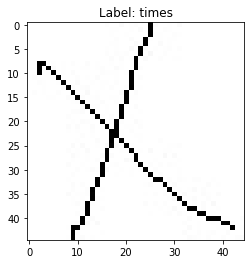

In [ ]:
image = cv2.imread(images[10550])
plt.imshow(image)
plt.title("Label: " + label[10550])
plt.show()

In [ ]:
train_image, test_image, train_label, test_label = train_test_split(images, label, test_size=0.3, random_state=2)

In [ ]:
X_train = []
X_test = []

# laoding the images from the path
for path in train_image:    
    img = cv2.imread(path)
    img = cv2.resize(img, (45, 45))
    img = np.array(img)
    X_train.append(img)

for path in test_image:    
    img = cv2.imread(path)
    img = cv2.resize(img, (45, 45))
    img = np.array(img)     
    X_test.append(img)

# creating numpy array from the images
X_train = np.array(X_train)
X_test = np.array(X_test)

In [ ]:
X_train.shape

(33193, 45, 45, 3)

In [ ]:
# normalizing the data
X_train = X_train.astype('float32')
X_train /= 255
print("X_train shape: ", X_train.shape)

X_train shape:  (33193, 45, 45, 3)


In [ ]:
X_test = X_test.astype('float32')
X_test /= 255
print("X_test shape: ", X_test.shape)

X_test shape:  (14226, 45, 45, 3)


In [ ]:
# label encoding the 20 symbols
label_encoder = preprocessing.LabelEncoder()
y_train_temp = label_encoder.fit_transform(train_label)
y_test_temp = label_encoder.fit_transform(test_label)
with open('/content/drive/MyDrive/eq_solver/encoder.pickle', 'wb') as handle:
    pickle.dump(label_encoder, handle)

In [ ]:
print("y_train_temp shape: ", y_train_temp.shape)
print("y_test_temp shape: ", y_test_temp.shape)

y_train_temp shape:  (33193,)
y_test_temp shape:  (14226,)


In [ ]:
# creating matrix labels list
y_train = keras.utils.np_utils.to_categorical(y_train_temp, 20)
y_test = keras.utils.np_utils.to_categorical(y_test_temp, 20)


print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

y_train shape:  (33193, 20)
y_test shape:  (14226, 20)


In [ ]:
# using sequential model for training
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(45, 45, 3), activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(128, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.15))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.15))

# last layer predicts 20 labels
model.add(Dense(20, activation="softmax"))

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 45, 45, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 43, 43, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 21, 21, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 21, 21, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

In [ ]:
history = model.fit(
    X_train,
    y_train,
    batch_size=100,
    epochs=50,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/50
266/266 [==============================] - 8s 28ms/step - loss: 0.5764 - accuracy: 0.8266 - val_loss: 0.1313 - val_accuracy: 0.9620
Epoch 2/50
266/266 [==============================] - 7s 26ms/step - loss: 0.1364 - accuracy: 0.9596 - val_loss: 0.0900 - val_accuracy: 0.9733
Epoch 3/50
266/266 [==============================] - 7s 26ms/step - loss: 0.0936 - accuracy: 0.9717 - val_loss: 0.0895 - val_accuracy: 0.9744
Epoch 4/50
266/266 [==============================] - 7s 26ms/step - loss: 0.0684 - accuracy: 0.9788 - val_loss: 0.0611 - val_accuracy: 0.9804
Epoch 5/50
266/266 [==============================] - 8s 28ms/step - loss: 0.0619 - accuracy: 0.9805 - val_loss: 0.0579 - val_accuracy: 0.9816
Epoch 6/50
266/266 [==============================] - 7s 26ms/step - loss: 0.0496 - accuracy: 0.9841 - val_loss: 0.0717 - val_accuracy: 0.9794
Epoch 7/50
266/266 [==============================] - 7s 26ms/step - loss: 0.0474 - accuracy: 0.9846 - val_loss: 0.0656 - val_accuracy: 0.9827

In [ ]:
model.save('/content/drive/MyDrive/eq_solver/new_model_3.h5')

In [ ]:
model = load_model('/content/drive/MyDrive/eq_solver/new_model_3.h5')

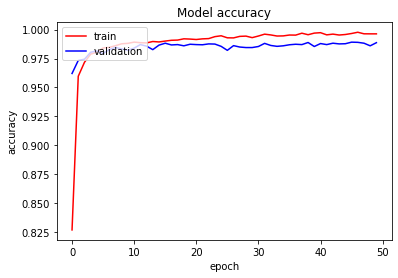

In [ ]:
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

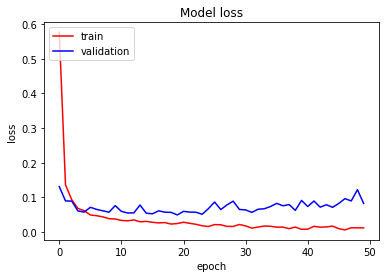

In [ ]:
# displaying the model loss
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

445/445 [==============================] - 2s 5ms/step - loss: 0.0748 - accuracy: 0.9888
Test score: 0.0748383030295372
Test accuracy: 0.9887529611587524


(1, 45, 45, 3)
1/1 [==============================] - 0s 225ms/step
(1, 45, 45, 3)
1/1 [==============================] - 0s 17ms/step
(1, 45, 45, 3)
1/1 [==============================] - 0s 16ms/step
(1, 45, 45, 3)
1/1 [==============================] - 0s 14ms/step
(1, 45, 45, 3)
1/1 [==============================] - 0s 14ms/step
(1, 45, 45, 3)
1/1 [==============================] - 0s 14ms/step
(1, 45, 45, 3)
1/1 [==============================] - 0s 14ms/step
(1, 45, 45, 3)
1/1 [==============================] - 0s 15ms/step
(1, 45, 45, 3)
1/1 [==============================] - 0s 14ms/step
(1, 45, 45, 3)
1/1 [==============================] - 0s 16ms/step


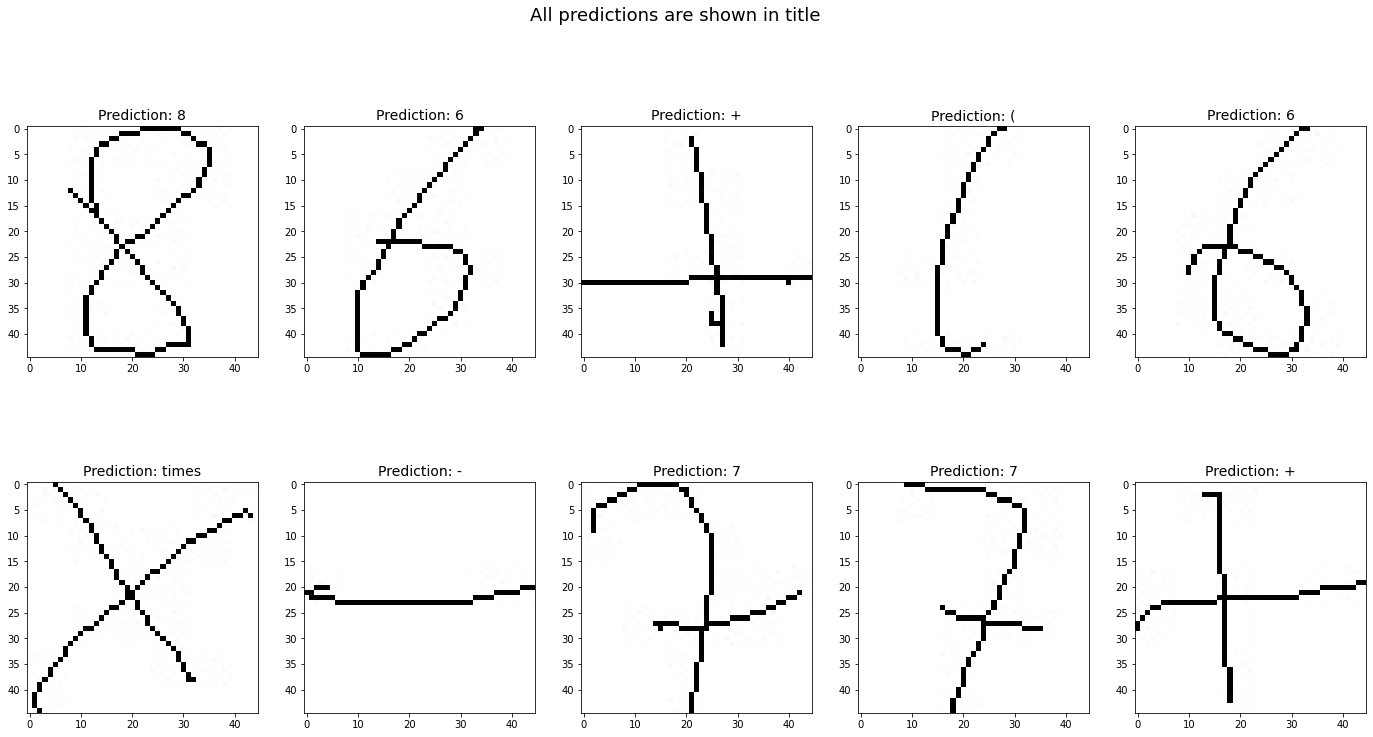

In [ ]:
fig, axs= plt.subplots(2,5, figsize=[24,12])

count=0

for i in range(2):    
    for j in range(5):  
        
        image = cv2.imread(test_image[count + count*120])
        img = cv2.resize(image, (45, 45))        
        img = np.array(img)
        img = np.expand_dims(img, axis=0)
        img = img.astype('float32')
        img /= 255
        print(img.shape)
        
        
        pred = model.predict(img)        
        result = np.argsort(pred)  
        result = result[0][::-1]

        final_label = label_encoder.inverse_transform(np.array(result))
                        
        axs[i][j].imshow(image)
        axs[i][j].set_title(str("Prediction: " + final_label[0]), fontsize = 14)        
        
        count += 1
        
plt.suptitle("All predictions are shown in title", fontsize = 18)        
plt.show()